# Exercise 1 - Group 4
- Matthias Egli
- Florian Bär
- Manuel Vogel
- Adrian Willi

In [1]:
import numpy as np
import torch
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

### Utilities

The test function that is used for illustrating the workings of the optimisers.

In [3]:
def test_function(x):
    return x[0]**2/15.0+x[1]**2

Utility for plotting the contours of a given function`f` in a range `r` (4-tuple) and 20 levels up to a max level given by `s`. 

In [88]:
def plot_contours(r, s, f):
    matplotlib.rcParams['xtick.direction'] = 'out'
    matplotlib.rcParams['ytick.direction'] = 'out'
    delta = 0.01
    X = np.arange(r[0], r[1], delta)
    Y = np.arange(r[2], r[3], delta)
    X,Y = np.meshgrid(X, Y)  
    XX = np.stack((X,Y), axis=0)
    Z=f(XX)
    V=np.arange(0.2,s,s/20)**2
    #CS = plt.contour(X, Y, Z, V, colors=colors)
    #plt.clabel(CS, inline=1, fontsize=10)
    CS = plt.contour(X, Y, Z, V)

Optimisation (i.e. minimisation) of the function `f` starting at `x` (pytorch tensor), by using the given `optimizer` over`nepochs`epochs.  

In [5]:
def optimize(f, x, nepochs, optimizer):
    params = [x,]
    xhist = [x[0].item()]
    yhist = [x[1].item()]
    optimizer.param_groups[0]['params'] = params
    for i in range(nepochs):
        y = f(x)
        optimizer.zero_grad()
        y.backward()
        optimizer.step()
        xhist.append(x[0].item())    
        yhist.append(x[1].item())
    return xhist, yhist

RMS error for measuring the discrepancy to the final target (for the test function above it is (0,0). 

In [6]:
def error(xhist,yhist):
    x,y = xhist[-1], yhist[-1]
    return "%6.3f, (%6.3f, %6.3f)"%(np.sqrt(x**2+y**2),x,y)

### Sample Run

SGD - lr=0.3   1.326, (-1.326, -0.000)


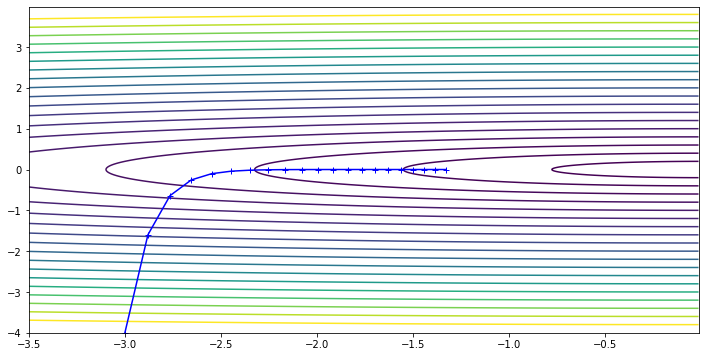

In [89]:
nepochs = 20

plt.figure(1,figsize=(12,6))
plot_contours([-3.5,0.,-4.,4.], 4., test_function)

# initial value
x = torch.tensor([-3.0,-4.0]).requires_grad_()

optimizer = torch.optim.SGD([x],lr=.3)
xhist, yhist = optimize(test_function, x, nepochs, optimizer)  

plt.plot(xhist,yhist,"b-+", label="lr=0.3")
print("SGD - lr=0.3 ", error(xhist,yhist))


### Tasks 

For better comparison, always use the same (non-optimal) initial point.  

* Study SGD for different learning rates.
* Compare Momentum for different momentum parameters and characterise how the optimisation paths qualitatively change.
* Can you spot a difference with / without Nesterov? 
* Play with different settings for the parameter $\beta_1$ and characterise how the optimisation paths qualitatively change.
* Finally, check different settings for Adam. Experiment with different learning rates. Can you experimentally verify that Adam is less sensitive to the choice of the learning rate than e.g. SGD?
* Identify your best parameters for each of the models above - for the given example. How many steps are needed with these settings to reach the minimum of the function at (0,0) within an accuracy of 1.0e-3


### Study SGD for different learning rates
For a higher learning rate the steps are bigger while for a smaller learning rate the steps are smaller and more accurate. One drawback of a small learning is that many epoches are required to find the minima.

#### for 30 epoches

SGD - lr=0.8  0.102, (-0.102, -0.000)
SGD - lr=0.4  0.579, (-0.579, -0.000)
SGD - lr=0.2  1.333, (-1.333, -0.000)
SGD - lr=0.1  2.006, (-2.006, -0.005)


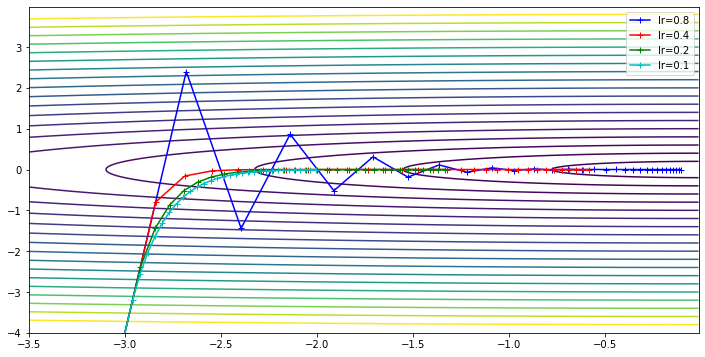

In [90]:
nepochs = 30

plt.figure(1,figsize=(12,6))
plot_contours([-3.5,0.,-4.,4.], 4., test_function)

n_lr = [0.8, 0.4, 0.2, 0.1]
n_col = ["b-+", "r-+", "g-+", "c-+"]

for lr, col in zip(n_lr, n_col):
    # initial value
    x = torch.tensor([-3.0,-4.0]).requires_grad_()
    
    optimizer = torch.optim.SGD([x],lr=lr)
    xhist, yhist = optimize(test_function, x, nepochs, optimizer)  

    plt.plot(xhist,yhist,col, label="lr="+str(lr))
    plt.legend(loc="best")
    print("SGD - lr="+str(lr), error(xhist,yhist))

#### for 200 epoches

SGD - lr=0.8  0.000, (-0.000, -0.000)
SGD - lr=0.4  0.000, (-0.000,  0.000)
SGD - lr=0.2  0.013, (-0.013, -0.000)
SGD - lr=0.1  0.205, (-0.205, -0.000)


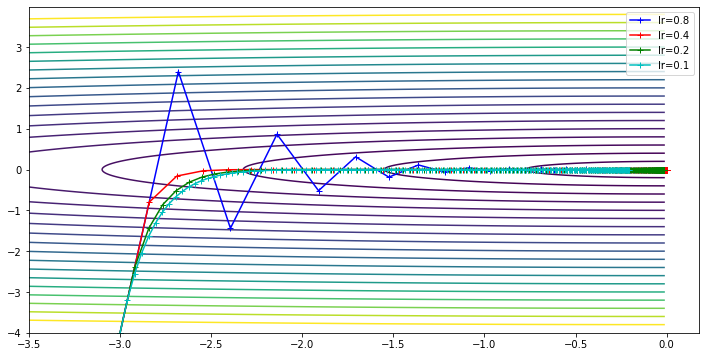

In [91]:
nepochs = 200

plt.figure(1,figsize=(12,6))
plot_contours([-3.5,0.,-4.,4.], 4., test_function)

n_lr = [0.8, 0.4, 0.2, 0.1]
n_col = ["b-+", "r-+", "g-+", "c-+"]

for lr, col in zip(n_lr, n_col):
    # initial value
    x = torch.tensor([-3.0,-4.0]).requires_grad_()
    
    optimizer = torch.optim.SGD([x],lr=lr)
    xhist, yhist = optimize(test_function, x, nepochs, optimizer)  

    plt.plot(xhist,yhist,col, label="lr="+str(lr))
    plt.legend(loc="best")
    print("SGD - lr="+str(lr), error(xhist,yhist))

### Compare Momentum for different momentum parameters and characterise how the optimisation paths qualitatively change
lr = 0.3, epoches = 70

A higher value for momentum leads to a faster convergence towards minima.

SGD - momentum=0.0  0.024, (-0.024,  0.000)
SGD - momentum=0.1  0.013, (-0.013, -0.000)
SGD - momentum=0.2  0.006, (-0.006, -0.000)
SGD - momentum=0.4  0.000, (-0.000, -0.000)


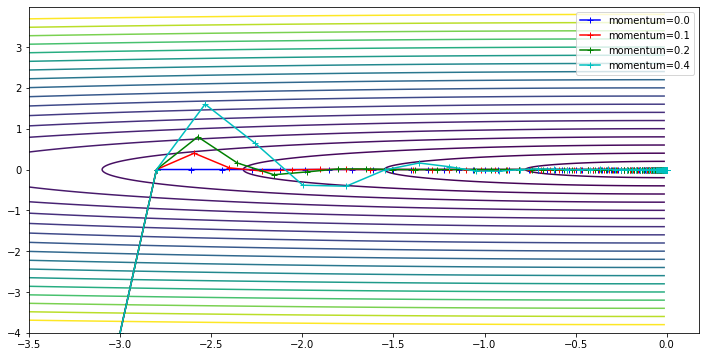

In [93]:
nepochs = 70

plt.figure(1,figsize=(12,6))
plot_contours([-3.5,0.,-4.,4.], 4., test_function)

lr = 0.5
n_momentum = [0.0, 0.1, 0.2, 0.4]
n_col = ["b-+", "r-+", "g-+", "c-+"]

for mom, col in zip(n_momentum, n_col):
    # initial value
    x = torch.tensor([-3.0,-4.0]).requires_grad_()
    
    optimizer = torch.optim.SGD([x],lr=lr, momentum=mom)
    xhist, yhist = optimize(test_function, x, nepochs, optimizer)  

    plt.plot(xhist,yhist,col, label="momentum="+str(mom))
    plt.legend(loc="best")
    print("SGD - momentum="+str(mom), error(xhist,yhist))

### Can you spot a difference with / without Nesterov?
lr = 0.5, epoches = 80

When nesterov is true it convergences even a bit faster (more directly to the minima)

SGD - momentum=0.01  0.011, (-0.011,  0.000)
SGD - momentum=0.1  0.006, (-0.006,  0.000)
SGD - momentum=0.2  0.003, (-0.003,  0.000)
SGD - momentum=0.4  0.000, (-0.000,  0.000)


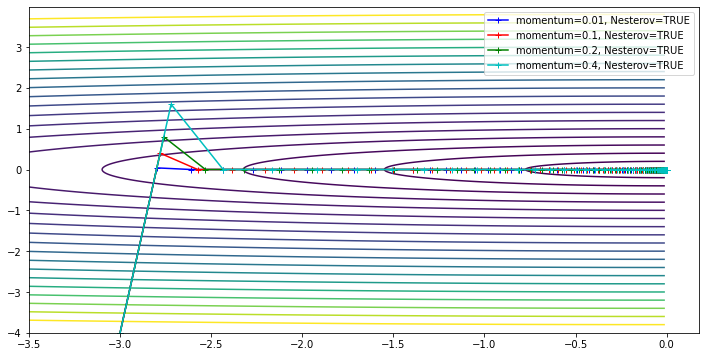

In [95]:
nepochs = 80

plt.figure(1,figsize=(12,6))
plot_contours([-3.5,0.,-4.,4.], 4., test_function)

lr = 0.5
n_momentum = [0.01, 0.1, 0.2, 0.4]
n_col = ["b-+", "r-+", "g-+", "c-+"]

for mom, col in zip(n_momentum, n_col):
    # initial value
    x = torch.tensor([-3.0,-4.0]).requires_grad_()
    
    optimizer = torch.optim.SGD([x],lr=lr, momentum=mom, nesterov=True)
    xhist, yhist = optimize(test_function, x, nepochs, optimizer)  

    plt.plot(xhist,yhist,col, label="momentum="+str(mom)+ ", Nesterov=TRUE")
    plt.legend(loc="best")
    print("SGD - momentum="+str(mom), error(xhist,yhist))

### Play with different settings for the parameter  $\beta_1$  and characterise how the optimisation paths qualitatively change
See plots above. A higher value for momentum leads to a faster convergence towards minima.

### Finally, check different settings for Adam. Experiment with different learning rates. Can you experimentally verify that Adam is less sensitive to the choice of the learning rate than e.g. SGD?

SGD - lr=0.7  0.000, ( 0.000,  0.000)
SGD - lr=0.2  0.001, (-0.000, -0.001)
SGD - lr=0.15  0.001, (-0.001, -0.000)
SGD - lr=0.12  0.001, ( 0.001,  0.000)


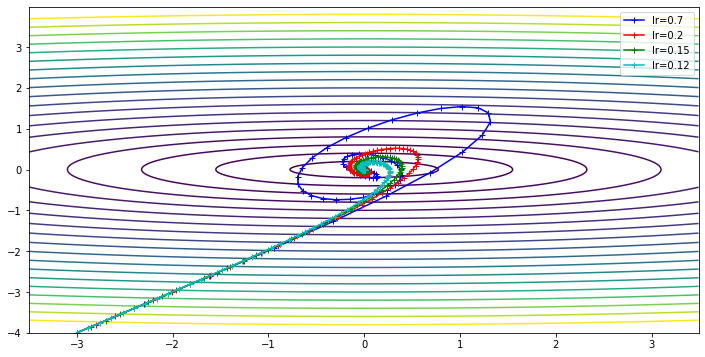

In [97]:
nepochs = 160

plt.figure(1,figsize=(12,6))
plot_contours([-3.5,3.5,-4.,4.], 4., test_function)

n_lr = [0.7, 0.2, 0.15, 0.12]
n_col = ["b-+", "r-+", "g-+", "c-+"]

for lr, col in zip(n_lr, n_col):
    # initial value
    x = torch.tensor([-3.0,-4.0]).requires_grad_()
    
    optimizer = torch.optim.Adam([x],lr=lr)
    xhist, yhist = optimize(test_function, x, nepochs, optimizer)  

    plt.plot(xhist,yhist,col, label="lr="+str(lr))
    plt.legend(loc="best")
    print("SGD - lr="+str(lr), error(xhist,yhist))

### Identify your best parameters for each of the models above - for the given example. How many steps are needed with these settings to reach the minimum of the function at (0,0) within an accuracy of 1.0e-3
see plot above